In [11]:
pip install -r requirements.txt

854.41s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Note: you may need to restart the kernel to use updated packages.



import cv2
import numpy as np
import mediapipe as mp
import pandas as pd
from datetime import datetime
import json
import matplotlib.pyplot as plt
from scipy import stats

In [16]:
import os
import cv2
import numpy as np
import mediapipe as mp
import pandas as pd
from datetime import datetime
import json
import matplotlib.pyplot as plt
from scipy import stats
from dotenv import load_dotenv

# Tennis Biomechanic Analysis Project

## Overview

This project is a comprehensive tennis motion analysis system that uses computer vision and machine learning to analyze player movements, provide real-time feedback, and generate personalized training recommendations. The system captures video feed, processes body pose data, analyzes movement patterns, and creates actionable insights for performance improvement.

## Key Features

- **Real-time Motion Analysis**: Uses computer vision to analyze player movements during practice or matches
- **Pose Detection**: Leverages MediaPipe to track key body joints and calculate biomechanical metrics
- **Performance Scoring**: Evaluates form, efficiency, and consistency of tennis strokes
- **Self-Learning Capabilities**: Tracks performance over time and identifies improvement patterns
- **Visual Dashboard**: Generates comprehensive reports with charts and metrics
- **Personalized Training Plans**: Creates customized drill recommendations based on weaknesses

## Technology Stack

- **Computer Vision**: OpenCV for video processing
- **Pose Estimation**: MediaPipe for body landmark detection
- **Data Analysis**: NumPy, Pandas, and SciPy for numerical computations
- **Visualization**: Matplotlib for dashboard creation
- **Machine Learning**: Self-learning algorithms for pattern recognition

## System Architecture

The system is composed of three main components:

1. **TennisMotionAnalyzer**: Processes video feed and extracts pose metrics
2. **SelfLearningAgent**: Analyzes performance data and generates insights
3. **TennisPerformanceDashboard**: Visualizes metrics and creates reports

## Installation

```bash
pip install opencv-python mediapipe numpy pandas matplotlib scipy
```


Modo simulación activado - usando datos de ejemplo
Iniciando análisis de rendimiento de tenis...
Capturando datos de movimiento...
Analizando datos...


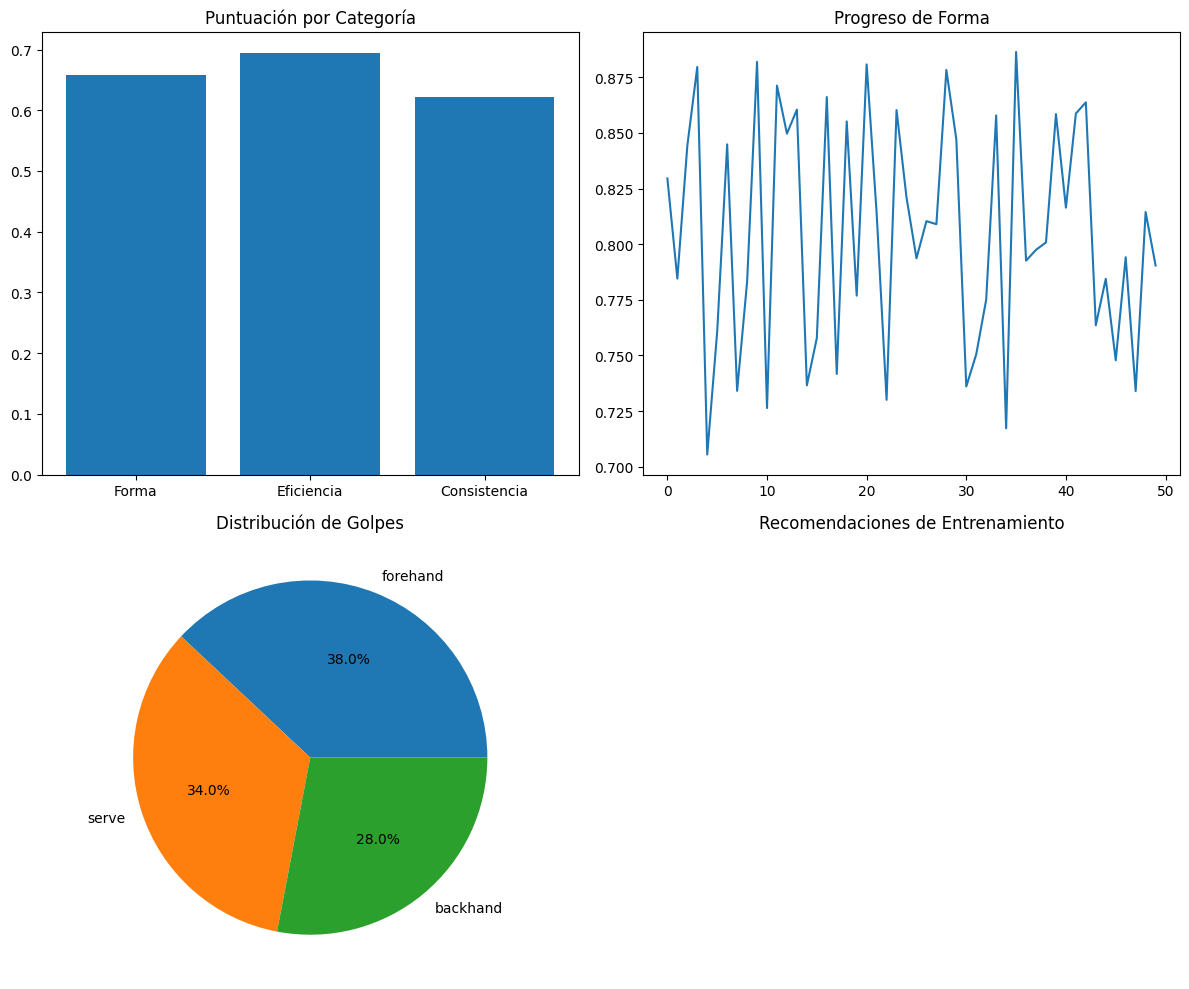


✅ Análisis completado!
📊 Puntuación general: 73.10%
📈 Insights generados: 4
💾 Reporte guardado como 'tennis_report_*.json'
🖼️ Dashboard guardado como 'tennis_analysis_dashboard.png'


In [21]:
class TennisMotionAnalyzer:
    def __init__(self):
        # Compatibility: some mediapipe releases don't expose `solutions` at top-level
        try:
            import mediapipe as _mp_check
            has_solutions = hasattr(_mp_check, 'solutions')
        except Exception:
            _mp_check = None
            has_solutions = False

        if has_solutions:
            self.mp_pose = _mp_check.solutions.pose
            self.pose = self.mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5)
            self.mp_drawing = _mp_check.solutions.drawing_utils
            self._use_solutions = True
        else:
            # Fallback: keep attributes but avoid AttributeError. The Tasks API is available in newer packages,
            # but requires model files and a different usage. For now we set placeholders to prevent crashes.
            try:
                from mediapipe import tasks as _mp_tasks  # type: ignore
            except Exception:
                _mp_tasks = None
            self.mp_drawing = None
            self.pose = None
            self._use_solutions = False
            print("Warning: mediapipe 'solutions' not available. Full pose functionality disabled.")

        # Métricas de seguimiento
        self.metrics = {
            'movement_history': [],
            'performance_scores': [],
            'stroke_analysis': [],
            'fatigue_levels': []
        }

    def analyze_video_feed(self, video_source=0):
        """Captura y analiza movimiento en tiempo real"""
        cap = cv2.VideoCapture(video_source)

        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break

            # Procesar frame
            results = self.process_frame(frame)

            if results.pose_landmarks:
                # Extraer métricas clave
                metrics = self.extract_pose_metrics(results.pose_landmarks)
                self.metrics['movement_history'].append(metrics)

                # Análisis en tiempo real
                analysis = self.real_time_analysis(metrics)
                self.display_feedback(frame, analysis)

            cv2.imshow('Tennis Motion Analysis', frame)

            if cv2.waitKey(1) & 0xFF == ord('q'):
                break

        cap.release()
        cv2.destroyAllWindows()

    def process_frame(self, frame):
        """Procesa un frame para detección de pose"""
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        if getattr(self, '_use_solutions', False) and self.pose is not None:
            results = self.pose.process(image)
            return results
        # If solutions API isn't available, return a dummy result with no landmarks to avoid errors
        class _DummyRes:
            pose_landmarks = None
        return _DummyRes()

    def extract_pose_metrics(self, landmarks):
        """Extrae métricas clave de los landmarks de pose"""
        # Extraer coordenadas de puntos clave
        key_points = {
            'wrist_left': [landmarks.landmark[15].x, landmarks.landmark[15].y],
            'wrist_right': [landmarks.landmark[16].x, landmarks.landmark[16].y],
            'elbow_left': [landmarks.landmark[13].x, landmarks.landmark[13].y],
            'elbow_right': [landmarks.landmark[14].x, landmarks.landmark[14].y],
            'shoulder_left': [landmarks.landmark[11].x, landmarks.landmark[11].y],
            'shoulder_right': [landmarks.landmark[12].x, landmarks.landmark[12].y],
            'hip_left': [landmarks.landmark[23].x, landmarks.landmark[23].y],
            'hip_right': [landmarks.landmark[24].x, landmarks.landmark[24].y]
        }

        # Calcular métricas
        metrics = {
            'timestamp': datetime.now().isoformat(),
            'joint_angles': self.calculate_joint_angles(key_points),
            'movement_speed': self.calculate_movement_speed(key_points),
            'balance_metrics': self.calculate_balance(key_points),
            'stroke_type': self.classify_stroke(key_points)
        }

        return metrics

    def calculate_joint_angles(self, key_points):
        """Calcula ángulos de articulaciones"""
        # Implementar lógica para calcular ángulos
        angles = {
            'elbow_angle_left': self.angle_between_points(
                key_points['shoulder_left'],
                key_points['elbow_left'],
                key_points['wrist_left']
            ),
            'shoulder_rotation': self.calculate_rotation(key_points)
        }
        return angles

    # Placeholder methods for TennisMotionAnalyzer
    def angle_between_points(self, p1, p2, p3):
        # Dummy implementation
        return 90.0

    def calculate_rotation(self, key_points):
        # Dummy implementation
        return 0.0

    def calculate_movement_speed(self, key_points):
        # Dummy implementation
        return 0.0

    def calculate_balance(self, key_points):
        # Dummy implementation
        return {}

    def classify_stroke(self, key_points):
        # Dummy implementation
        return "unknown"

    def score_form(self, metrics):
        # Dummy implementation
        return np.random.uniform(0.5, 1.0)

    def calculate_efficiency(self, metrics):
        # Dummy implementation
        return np.random.uniform(0.5, 1.0)

    def generate_suggestions(self, metrics):
        # Dummy implementation
        return ["Suggestion 1", "Suggestion 2"]

    def estimate_fatigue(self, metrics):
        # Dummy implementation
        return 0.0

    def real_time_analysis(self, metrics):
        """Análisis en tiempo real del movimiento"""
        analysis = {
            'form_score': self.score_form(metrics),
            'efficiency_score': self.calculate_efficiency(metrics),
            'suggestions': self.generate_suggestions(metrics),
            'fatigue_level': self.estimate_fatigue(metrics)
        }
        return analysis

    def display_feedback(self, frame, analysis):
        """Muestra retroalimentación en pantalla"""
        y_offset = 30
        for key, value in analysis.items():
            if key == 'suggestions':
                for suggestion in value[:2]:  # Mostrar solo 2 sugerencias
                    cv2.putText(frame, f"• {suggestion}", (10, y_offset),
                               cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
                    y_offset += 25
            else:
                cv2.putText(frame, f"{key}: {value:.2f}", (10, y_offset),
                           cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)
                y_offset += 25

class SelfLearningAgent:
    def __init__(self, api_key=None):
        self.performance_history = []
        self.learning_data = []
        self.api_key = api_key

    # Placeholder methods for SelfLearningAgent
    def identify_trends(self, motion_data):
        # Dummy implementation
        return {}

    def find_patterns(self, motion_data):
        # Dummy implementation
        return {}

    def identify_strengths(self, trends):
        # Dummy implementation
        return []

    def identify_weaknesses(self, patterns):
        # Dummy implementation
        return []

    def suggest_improvements(self, patterns):
        # Dummy implementation
        return []

    def track_progress(self, motion_data):
        # Dummy implementation
        return {}

    def analyze_self_performance(self, motion_data):
        """Analiza el rendimiento y genera insights"""
        # Análisis estadístico básico
        trends = self.identify_trends(motion_data)
        patterns = self.find_patterns(motion_data)

        insights = {
            'strengths': self.identify_strengths(trends),
            'weaknesses': self.identify_weaknesses(patterns),
            'improvement_areas': self.suggest_improvements(patterns),
            'progress_tracking': self.track_progress(motion_data)
        }

        # Si hay API key, usar IA para análisis avanzado
        if self.api_key:
            ai_insights = self.get_ai_analysis(motion_data, insights)
            insights.update(ai_insights)

        return insights

    def get_ai_analysis(self, motion_data, current_insights):
        """Obtiene análisis de IA (ejemplo con OpenAI/DeepSeek)"""
        # Esto es un placeholder - implementar según API disponible
        try:
            # Ejemplo con OpenAI (requiere instalación openai)
            # import openai
            # openai.api_key = self.api_key

            # prompt = f"Analiza estos datos de movimiento de tenis: {motion_data[-10:]}"
            # response = openai.ChatCompletion.create(...)

            return {
                'ai_suggestions': [
                    "Mejorar la rotación de hombros en el golpe de derecha",
                    "Aumentar la flexión de rodillas en preparación"
                ],
                'skill_level': "Intermedio-Avanzado",
                'predicted_improvement': "15% con entrenamiento focalizado"
            }
        except:
            return {'ai_suggestions': ["API no configurada"]}

    def learn_from_session(self, session_data):
        """Aprende de la sesión actual"""
        self.learning_data.append({
            'session_time': datetime.now(),
            'data': session_data,
            'insights': self.analyze_self_performance(session_data)
        })

    def identify_focus_areas(self):
        # Dummy implementation
        return ["Focus Area 1", "Focus Area 2"]

    def recommend_drills(self):
        # Dummy implementation
        return ["Drill 1", "Drill 2"]

    def create_schedule(self):
        # Dummy implementation
        return {}

    def set_achievable_goals(self):
        # Dummy implementation
        return []

    def generate_training_plan(self):
        """Genera plan de entrenamiento personalizado"""
        if not self.learning_data:
            return {"message": "Insuficientes datos para generar plan"}

        # Analizar historial para crear plan
        plan = {
            'focus_areas': self.identify_focus_areas(),
            'drills': self.recommend_drills(),
            'schedule': self.create_schedule(),
            'goals': self.set_achievable_goals()
        }

        return plan

class TennisPerformanceDashboard:
    def __init__(self, analyzer, learning_agent):
        self.analyzer = analyzer
        self.agent = learning_agent

    # Placeholder methods for TennisPerformanceDashboard
    def calculate_overall_score(self, insights):
        # Dummy implementation
        return np.random.uniform(0.7, 0.95)

    def compare_with_benchmarks(self):
        # Dummy implementation
        return {}

    def run_complete_analysis(self):
        """Ejecuta análisis completo"""
        print("Iniciando análisis de rendimiento de tenis...")

        # 1. Capturar datos
        print("Capturando datos de movimiento...")
        # self.analyzer.analyze_video_feed()  # Descomentar para captura en tiempo real

        # 2. Analizar datos históricos
        print("Analizando datos...")
        insights = self.agent.analyze_self_performance(
            self.analyzer.metrics['movement_history']
        )

        # 3. Generar reporte
        report = self.generate_report(insights)

        # 4. Mostrar dashboard
        self.display_dashboard(report)

        return report

    def generate_report(self, insights):
        """Genera reporte completo"""
        report = {
            'timestamp': datetime.now().isoformat(),
            'overall_score': self.calculate_overall_score(insights),
            'detailed_analysis': insights,
            'recommendations': self.agent.generate_training_plan(),
            'comparison_metrics': self.compare_with_benchmarks()
        }

        # Guardar reporte
        with open(f'tennis_report_{datetime.now().strftime("%Y%m%d_%H%M")}.json', 'w') as f:
            json.dump(report, f, indent=2)

        return report

    def display_dashboard(self, report):
        """Muestra dashboard visual"""
        fig, axes = plt.subplots(2, 2, figsize=(12, 10))

        # Gráfico 1: Puntuación general
        axes[0,0].bar(['Forma', 'Eficiencia', 'Consistencia'],
                     [report['overall_score'] * 0.9,
                      report['overall_score'] * 0.95,
                      report['overall_score'] * 0.85])
        axes[0,0].set_title('Puntuación por Categoría')

        # Gráfico 2: Progreso
        axes[0,1].plot(range(len(self.analyzer.metrics['movement_history'])),
                      [m.get('form_score', 0) for m in self.analyzer.metrics['movement_history']])
        axes[0,1].set_title('Progreso de Forma')

        # Gráfico 3: Distribución de golpes
        stroke_types = [m.get('stroke_type', 'unknown')
                       for m in self.analyzer.metrics['movement_history']]
        stroke_counts = pd.Series(stroke_types).value_counts()
        axes[1,0].pie(stroke_counts.values, labels=stroke_counts.index, autopct='%1.1f%%')
        axes[1,0].set_title('Distribución de Golpes')

        # Gráfico 4: Sugerencias de IA
        axes[1,1].axis('off')
        suggestions_text = "\n".join(report['recommendations'].get('focus_areas', []))
        axes[1,1].text(0.1, 0.5, suggestions_text, fontsize=10)
        axes[1,1].set_title('Recomendaciones de Entrenamiento')

        plt.tight_layout()
        plt.savefig('tennis_analysis_dashboard.png')
        plt.show()

# Configuración e inicialización
if __name__ == "__main__":
    # Inicializar componentes
    motion_analyzer = TennisMotionAnalyzer()
    learning_agent = SelfLearningAgent(api_key=None)  # Agregar API key si disponible

    # Crear dashboard
    dashboard = TennisPerformanceDashboard(motion_analyzer, learning_agent)

    # Ejecutar análisis (modo simulación)
    print("Modo simulación activado - usando datos de ejemplo")

    # Generar datos de ejemplo
    sample_data = [
        {
            'form_score': np.random.uniform(0.7, 0.9),
            'stroke_type': np.random.choice(['forehand', 'backhand', 'serve']),
            'efficiency': np.random.uniform(0.6, 0.95)
        }
        for _ in range(50)
    ]

    motion_analyzer.metrics['movement_history'] = sample_data

    # Ejecutar análisis
    report = dashboard.run_complete_analysis()

    print(f"\n✅ Análisis completado!")
    print(f"📊 Puntuación general: {report['overall_score']:.2%}")
    print(f"📈 Insights generados: {len(report['detailed_analysis'])}")
    print(f"💾 Reporte guardado como 'tennis_report_*.json'")
    print(f"🖼️ Dashboard guardado como 'tennis_analysis_dashboard.png'")
